# Projet 2 : Analysez des données des systèmes éducatifs

Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.


Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

Quels sont les pays avec un fort potentiel de clients pour nos services ?
Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
Dans quels pays l'entreprise doit-elle opérer en priorité ?

Votre mission :
Votre mission
Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :

"Hello,

Les données de la Banque mondiale sont disponibles à l’adresse suivante :

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site :

http://datatopics.worldbank.org/education/

Pour la pré-analyse, pourrais-tu :

- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique).

Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !"



# Sommaire

# I. Importation des données

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


## a. Les bibliothèques

In [2]:
# Importation des bibliothèques numpy, pandas, matplotlib et seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

## b. Les fichiers

In [3]:
# Importation des bases de données

StatsCountrySeries = pd.read_csv('EdStatsCountry-Series.csv')
StatsCountry = pd.read_csv('EdStatsCountry.csv')
StatsData = pd.read_csv('EdStatsData.csv')
StatsFootNote = pd.read_csv('EdStatsFootNote.csv')
StatsSeries = pd.read_csv('EdStatsSeries.csv')

# II. Exploration des fichiers

## a. Analyse des fichiers 

Afin d'analyser les 5 fichiers, nous allons mettre en place une boucle for afin de lire les informations pertinentes dans un premier temps, à savoir :
- Affichage des 5 premières lignes par fichier
- Nombre de lignes et de colonnes par fichier,
- Nom des colonnes
- Type des colonnes,
- Information sur les fichiers

In [4]:
# Création boucle for

database = [StatsCountrySeries, StatsCountry, StatsData, StatsFootNote, StatsSeries]

for i in database:
    print ('-------------------------------------------------------------------------------------------------------')
    print(i.head(5))
    print ('----------------------------------------')
    print ('----------------------------------------')
    print ('Nombre de lignes et de colonnes', i.shape)
    print ('----------------------------------------')
    print(i.columns)
    print ('----------------------------------------')
    print(i.info())
    print ('----------------------------------------')

-------------------------------------------------------------------------------------------------------
  CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN  
----------------------------------------
----------------------------------------
Nombre de lignes et de colonnes (613, 4)
----------------------------------------
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')
-------------------------------

Dans le cadre de cette boucle, cette dernière va nous permettre d'obtenir des informations importantes sur le format de ce data.
Nous allons ici détailler cette première analyse :



1. StatsCountrySeries :

    Ce fichier contient 613 lignes et 4 colonnes. Ces colonnes semblent indiquer différents indicateurs ainsi que leur méthode d'obtention des données. Sur les différentes lignes, nous remarquons rapidement qu'une colonne est entièrement vide (cette dernière ne rentre plus dans notre analyse). Les 3 autres lignes sont des objets.



2. Stats Country :

    Ce second fichier contient 241 lignes et 32 colonnes. Ce fichier nous indique le nom des pays mais aussi les régions, les différentes monnaies mais également d'autres colonnes indiquant certains indications telles que la récolte des informations ou leur année d'obtention. Concernant les informations des colonnes, certaines colonnes présentent une forte présence de valeurs nulles et seulement quelques colonnes sans valeurs nulles ou avec très peu de valeurs manquantes. Nous avons dans ce fichier 4 colonnes float et 28 colonnes objets.
    
    
    
3. StatsData

    Ce troisième fichier contient 886930 lignes et 70 colonnes. Ce fichier semble bien nous indiquer les différents indicateurs selon les pays et en fonction des années. Concernant les valeurs nulles, une colonne est vide dans sa globalité.
Ensuite, il semble que nous ayons certains blocs :
    - le premier bloc concerne les années 1970 à 1999 ou de nombreuses valeurs sont absentes,
    - le second bloc entre 2000 et 2015 avec un nombre de valeurs plus faibles,
    - le troisième bloc entre 2016 et 2100 avec pour 2016 et 2017 de nombreuses valeurs nulles. Ensuite et à compter de 2020, nous remarquons que les dernières années ont un nombre de valeurs manquantes absolument identiques. En regardant la date de création du fichier, nous remarquons que les années supérieures à 2020 sont plutôt présentes pour effectuer une prédiction des données. Enfin, ce fichier contient 66 colonnes float et 4 colonnes objets.



4. StatsFootNote

    Ce quatrième fichier contient 643638 lignes et 5 colonnes. Ces colonnes nous indiquent la date d’obtention des données selon les indicateurs. Pour les valeurs nulles, 4 colonnes ne contiennent aucune valeur nulle tandis que nous avons également une colonne totalement vide. Enfin, les 4 colonnes utiles sont de type objet.



5. StatsSeries
Ce cinquième fichier contient 3665 lignes et 21 colonnes. Ce fichier est notamment présent pour obtenir les différentes définitions des indicateurs ainsi que la manière d’obtention des données. Pour les valeurs nulles, seules les colonnes pertinentes (définition complète, nom et code de l’indicateur ainsi que la source d’obtention des données) ne détiennent aucune valeur nulle. Les autres colonnes présentes un très grand nombre de valeurs nulles.



    Nous pouvons ici conclure que nous avons pu explorer les principales caractéristiques de nos différents fichiers. Nous pouvons remarquer que ces 5 fichiers ne semblent pas pertinentes pour la continuité de notre projet. En effet, certains sont notamment présents pour indiquer, définir ou préciser certaines données. A ce premier stade, j’estime que les fichiers StatsCountry et StatsData sont les plus pertinents. Nous allons donc conserver uniquement ces deux fichiers pour la suite de notre projet sans supprimer les autres fichiers.


In [5]:
datavaleurs = [StatsCountry, StatsData]

# Pour être plus complet, nous allons refaire la moyenne mais en indiquant l'ensemble des colonnes pour notre analyse
pd.set_option('display.max_columns', None)# on commence par les colonnes
pd.set_option('display.max_rows', None)   # puis les lignes

for i in datavaleurs:
    print('---------------------------------------------------------------------------------------------------')
    print(i.isnull().mean()*100)

---------------------------------------------------------------------------------------------------
Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Othe

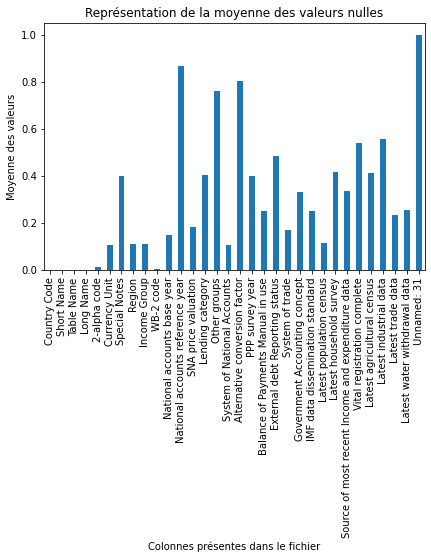

<function matplotlib.pyplot.show(close=None, block=None)>

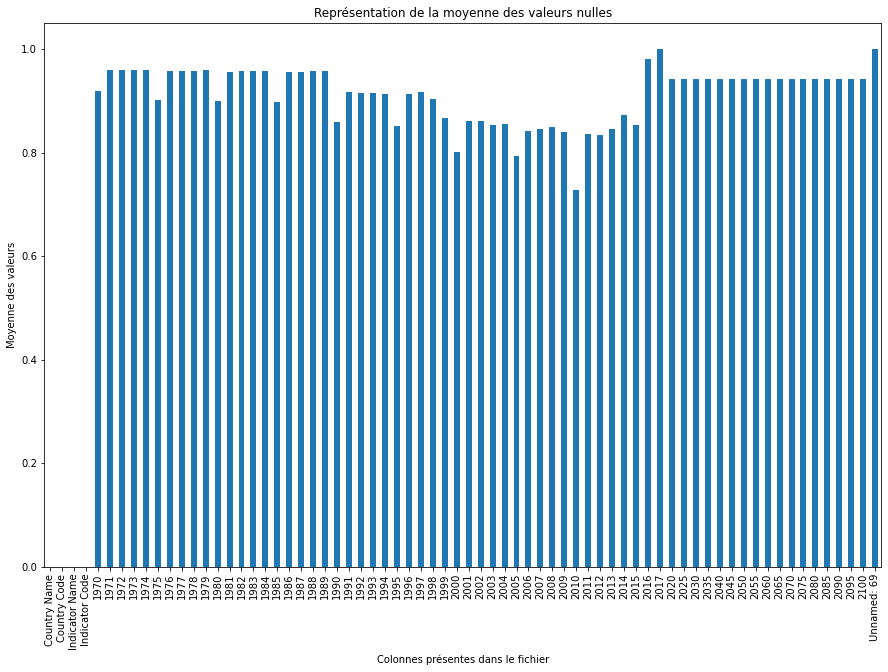

In [6]:
# Graphique pour constater la moyenne des valeurs nulles sur les deux fichiers

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
StatsCountry.isnull().mean().plot(kind = 'bar')
plt.title('Représentation de la moyenne des valeurs nulles')
plt.xlabel('Colonnes présentes dans le fichier')
plt.ylabel('Moyenne des valeurs')
plt.show()


plt.figure(figsize = (15, 10))
plt.subplot(1,1,1)
StatsData.isnull().mean().plot(kind = 'bar')
plt.title('Représentation de la moyenne des valeurs nulles')
plt.xlabel('Colonnes présentes dans le fichier')
plt.ylabel('Moyenne des valeurs')
plt.show


Sur l'analyse des valeurs manquantes, nous pouvons remarquer que les données à partir de 2020 présentent le même niveau de valeurs manquantes et peu utiles à ce jour : nous allons donc les supprimer.
Les données entre 1971 et 1999 représentent également un grand nombre de valeurs manquantes.
Dans le cadre de notre analyse, ces dernières sont assez peu pertinentes, nous allons nous interroger si ces dernières ont une véritable utilité.

Ainsi, nous pourrions rester avec les 4 colonnes objets mais aussi avec les données entre 2000 et 2015 (les années au delà présentent un très grand nombre de valeurs manquantes.

Nous pourrions ainsi passer à un data frame avec seulement 16 années et les 4 variables objets du départ.

## b. analyse des fichiers et des valeurs nulles

Text(0.5, 1.0, 'Nombre de pays par région')

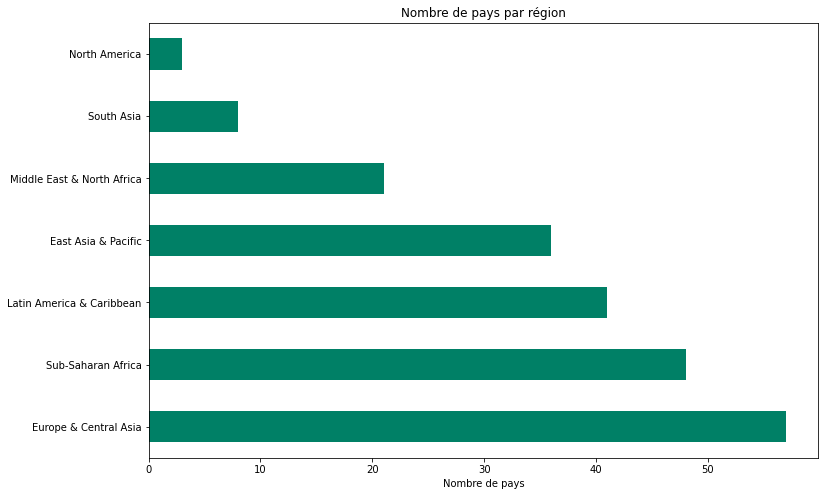

In [7]:
# Nous allons regarder le nombre de pays par régions
plt.figure (figsize = (12,8))

StatsCountry['Region'].value_counts().plot(kind = 'barh', cmap = 'summer')
plt.xlabel('Nombre de pays')
plt.title('Nombre de pays par région')

Text(0.5, 1.0, 'Nombre de pays par niveau de revenus')

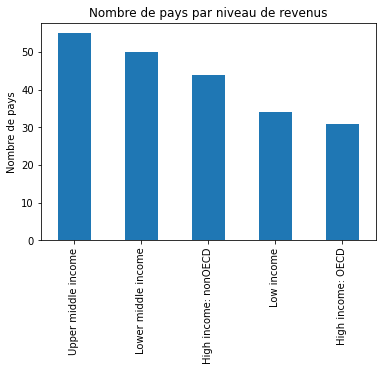

In [8]:
# Analyse selon les revenus
StatsCountry['Income Group'].value_counts().plot(kind = 'bar')
plt.ylabel('Nombre de pays')
plt.title('Nombre de pays par niveau de revenus')

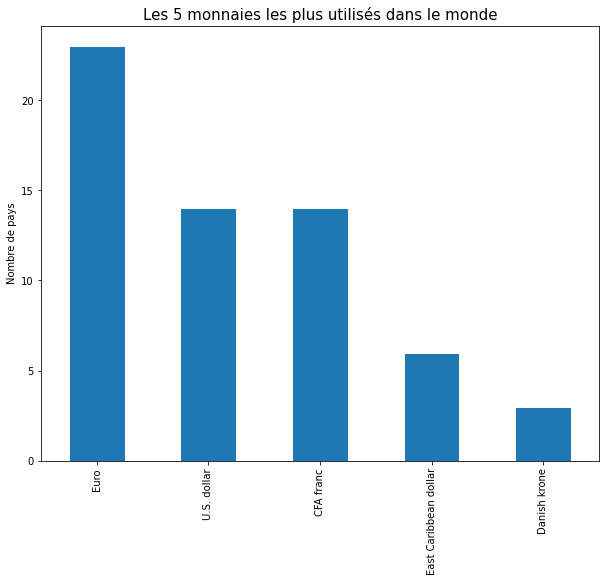

In [9]:
plt.figure(figsize = (10,8))
StatsCountry['Currency Unit'].value_counts().sort_values(ascending = False).head(5).plot(kind = 'bar',
                                                                                        edgecolor = 'w')
plt.title('Les 5 monnaies les plus utilisés dans le monde', size = 15)
plt.ylabel('Nombre de pays')
plt.show()

Sur l'analyse des valeurs manquantes, nous pouvons remarquer que les données à partir de 2020 présentent le même niveau de valeurs manquantes et peu utiles à ce jour : nous allons donc les supprimer.
Les données entre 1971 et 1999 représentent également un grand nombre de valeurs manquantes.
Dans le cadre de notre analyse, ces dernières sont assez peu pertinentes, nous allons nous interroger si ces dernières ont une véritable utilité.

Ainsi, nous pourrions rester avec les 4 colonnes objets mais aussi avec les données entre 2000 et 2015 (les années au delà présentent un très grand nombre de valeurs manquantes.

Nous pourrions ainsi passer à un data frame avec seulement 16 années et les 4 variables objets du départ.

In [10]:
StatsData['Indicator Code'].value_counts()

UIS.NERA.2                        242
SP.POP.1018.FE.UN                 242
SP.POP.1018.TO.UN                 242
SP.POP.1115.FE.UN                 242
SP.POP.1115.MA.UN                 242
SP.POP.1115.TO.UN                 242
SP.POP.1116.FE.UN                 242
SP.POP.1116.MA.UN                 242
SP.POP.1116.TO.UN                 242
SP.POP.1117.FE.UN                 242
SP.POP.1117.MA.UN                 242
SP.POP.1117.TO.UN                 242
SP.POP.1118.FE.UN                 242
SP.POP.1118.MA.UN                 242
SP.POP.1118.TO.UN                 242
SP.POP.1215.FE.UN                 242
SP.POP.1215.MA.UN                 242
SP.POP.1215.TO.UN                 242
SP.POP.1216.FE.UN                 242
SP.POP.1216.MA.UN                 242
SP.POP.1216.TO.UN                 242
SP.POP.1217.FE.UN                 242
SP.POP.1217.MA.UN                 242
SP.POP.1217.TO.UN                 242
SP.POP.1218.FE.UN                 242
SP.POP.1218.MA.UN                 242
SP.POP.1218.

Quand nous regardons le nom des différent indicateurs, nous pouvons constater que ces derniers sont regroupés par plusieurs indicateurs. Nous allons ici définir les principaux indicateurs.


- BAR : Indicateurs barro-lee, aggrégés sur 5 ans selon 7 niveaux d'éducation
- HH : regroupe DHS (Demographic and Health Surveys) et MICS (Multiple Indicator Cluster Surveys)
- IT : Infrastructure : utilisateurs internet et ordinateurs
- LO : Learning Outcomes (Evaluation du niveau des éléves en science, lecture..)
- NY : National Accounts, produits intérieurs et nationaux
- OECD : OCDE, salaires des enseignants du secteur public
- PRJ : Projections Wittgenstein (durée de scolarisation, populations..)
- SABER : System Approach for Better Education
- SE : Social Education
- SL : Social Labor
- SH : Social Health
- SP : Social Population
- UIS : Unesco Institute for Statistics
- XGDP : Dépenses publiques dans l'éducation

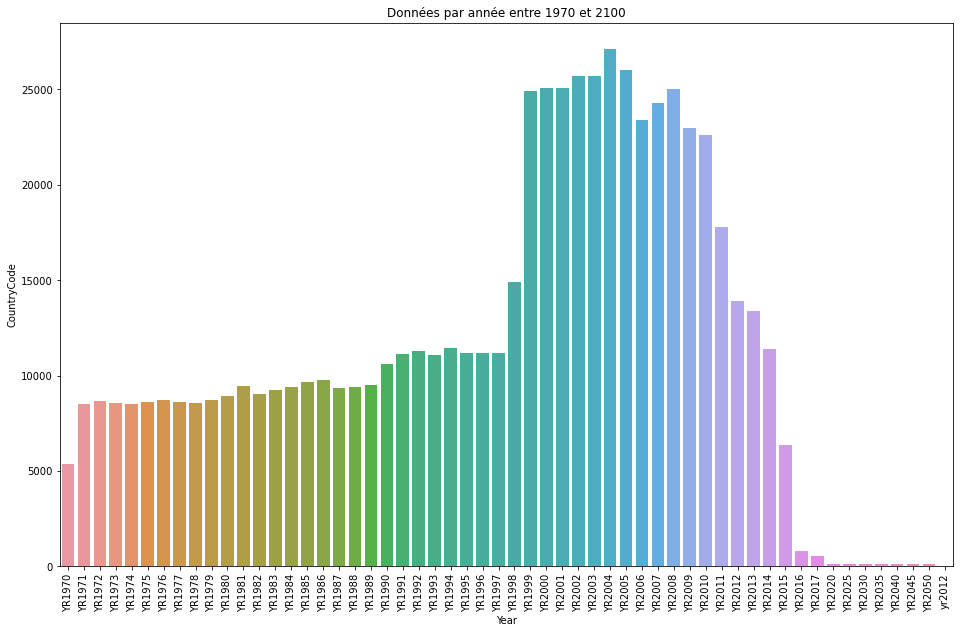

In [11]:
# Nombre de données par année
plt.figure(figsize=(16, 10))
plt.title('Données par année entre 1970 et 2100')
plot = sns.barplot(y = 'CountryCode', x='Year', data = StatsFootNote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = StatsFootNote.groupby('Year').count().reset_index()['Year'], rotation = 90)
plt.show()

On constate que les données ont une légère variation par décennie hormis entre 2020 et 2100.
Nous allons ici procéder à la création d'un graphique par décennie entre 1970 et 2017 puis entre 2020 et 2100 comme données.

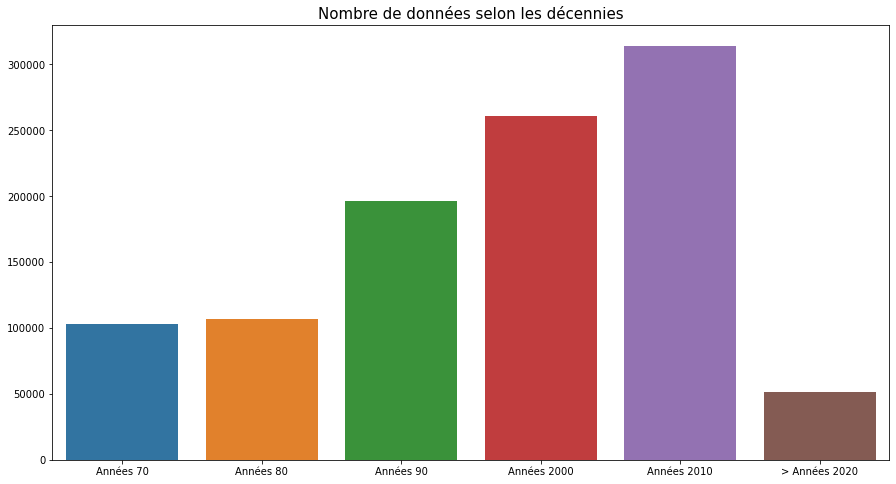

In [12]:
data1 = StatsData

data1['Années 70'] = data1[[str(year) for year in range(1970,1980,1)]].mean(1)
data1['Années 80'] = data1[[str(year) for year in range(1980,1990,1)]].mean(1)
data1['Années 90'] = data1[[str(year) for year in range(1990,2000,1)]].mean(1)
data1['Années 2000'] = data1[[str(year) for year in range(2000,2010,1)]].mean(1)
data1['Années 2010'] = data1[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
data1['> Années 2020'] = data1[[str(year) for year in [2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100]]].mean(1)


plt.figure(figsize=(15, 8))
plt.title('Nombre de données selon les décennies', size = 15)
plot = sns.barplot(y = data1.shape[0] - data1[['Années 70', 'Années 80', 'Années 90', 'Années 2000', 'Années 2010', '> Années 2020',]].isna().sum().values, 
                   x = data1[['Années 70', 'Années 80', 'Années 90', 'Années 2000', 'Années 2010', '> Années 2020']].isna().sum().index)
plt.show()

On peut ici confirmer notre hypothèse selon laquelle les décennies présentent une forte disparité dans les données.
Il apparaît comme judicieux de conserver uniquement les années 2010 dans notre analyse finale.
Toutefois et comme constater dans le précédent graphique, les années 2016 et 2017 présentent une très forte chute des valeurs présentes. Nous allons donc procéder à une analyse entre 2010 et 2015 pour nos données

In [13]:
StatsData.groupby('Country Name')[['Indicator Code']].count()

,Indicator Code
Country Name,
Afghanistan,3665
Albania,3665
Algeria,3665
American Samoa,3665
Andorra,3665
Angola,3665
Antigua and Barbuda,3665
Arab World,3665
Argentina,3665


Sur notre seconde analyse, nous pouvons constater que le nombre de colonnes est passé de 70 à 20, cette première phase semble être la plus cohérente pour notre hypothèse. Nous allons maintenant supprimer les lignes ou l'ensemble des années sont manquantes afin de retrouver un dataframe plus propre.

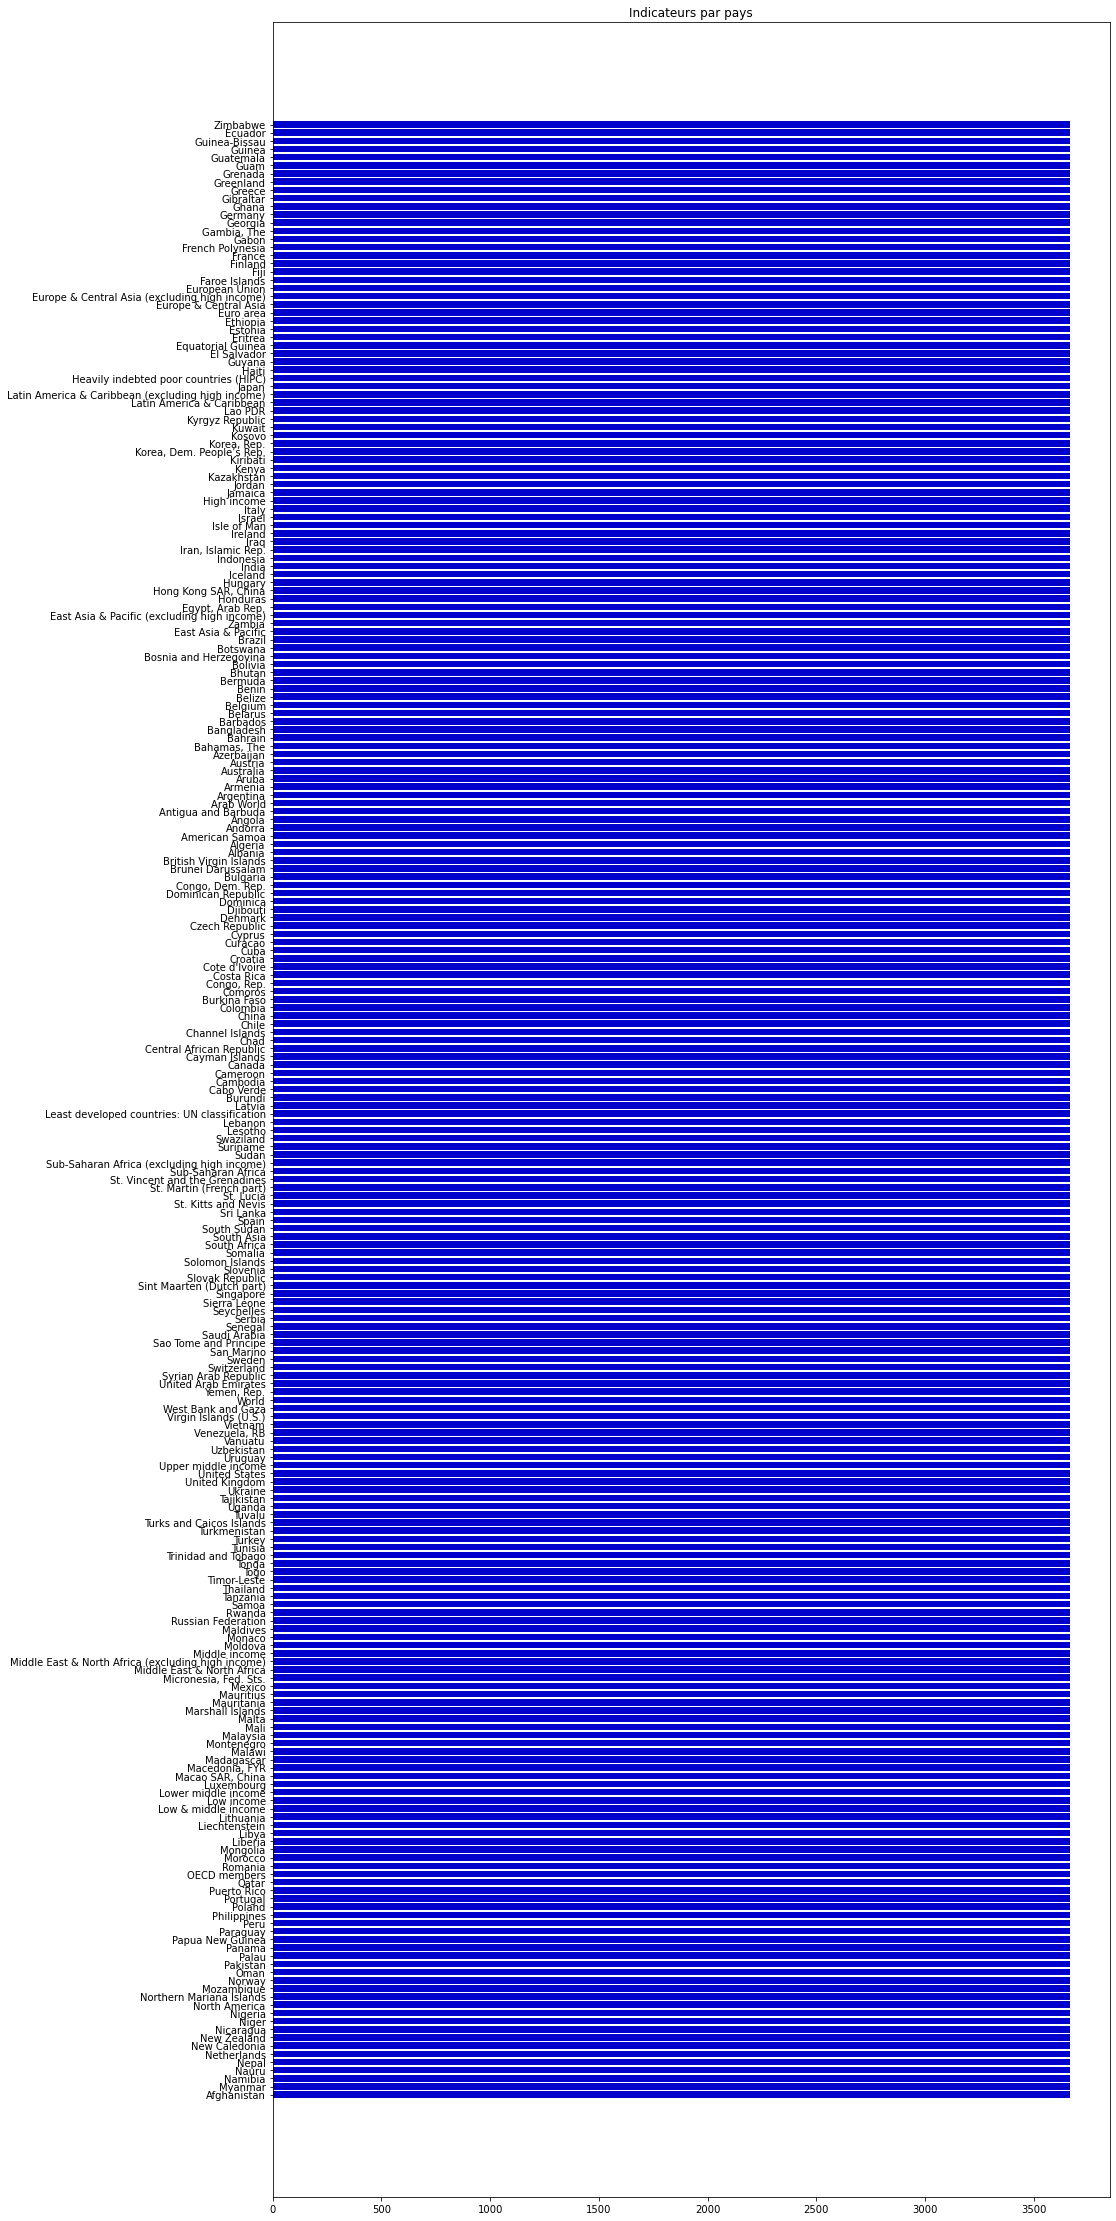

In [14]:
plt.figure(figsize=(15,40))
plt.barh(y = StatsData.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Country Name'], 
         width =  StatsData.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Indicator Code'],
        color = 'mediumblue', linewidth = 1)
plt.title('Indicateurs par pays')
plt.show()

Nous allons ici sélectionner les indicateurs les plus pertinents pour analyse afin de nous permettre une analyse cohérente.
L'ensemble des pays seront alors analysés avec des indicateurs absolument identiques et nous permettront de dégager une analyse permettant de sélectionner les pays les plus pertinents

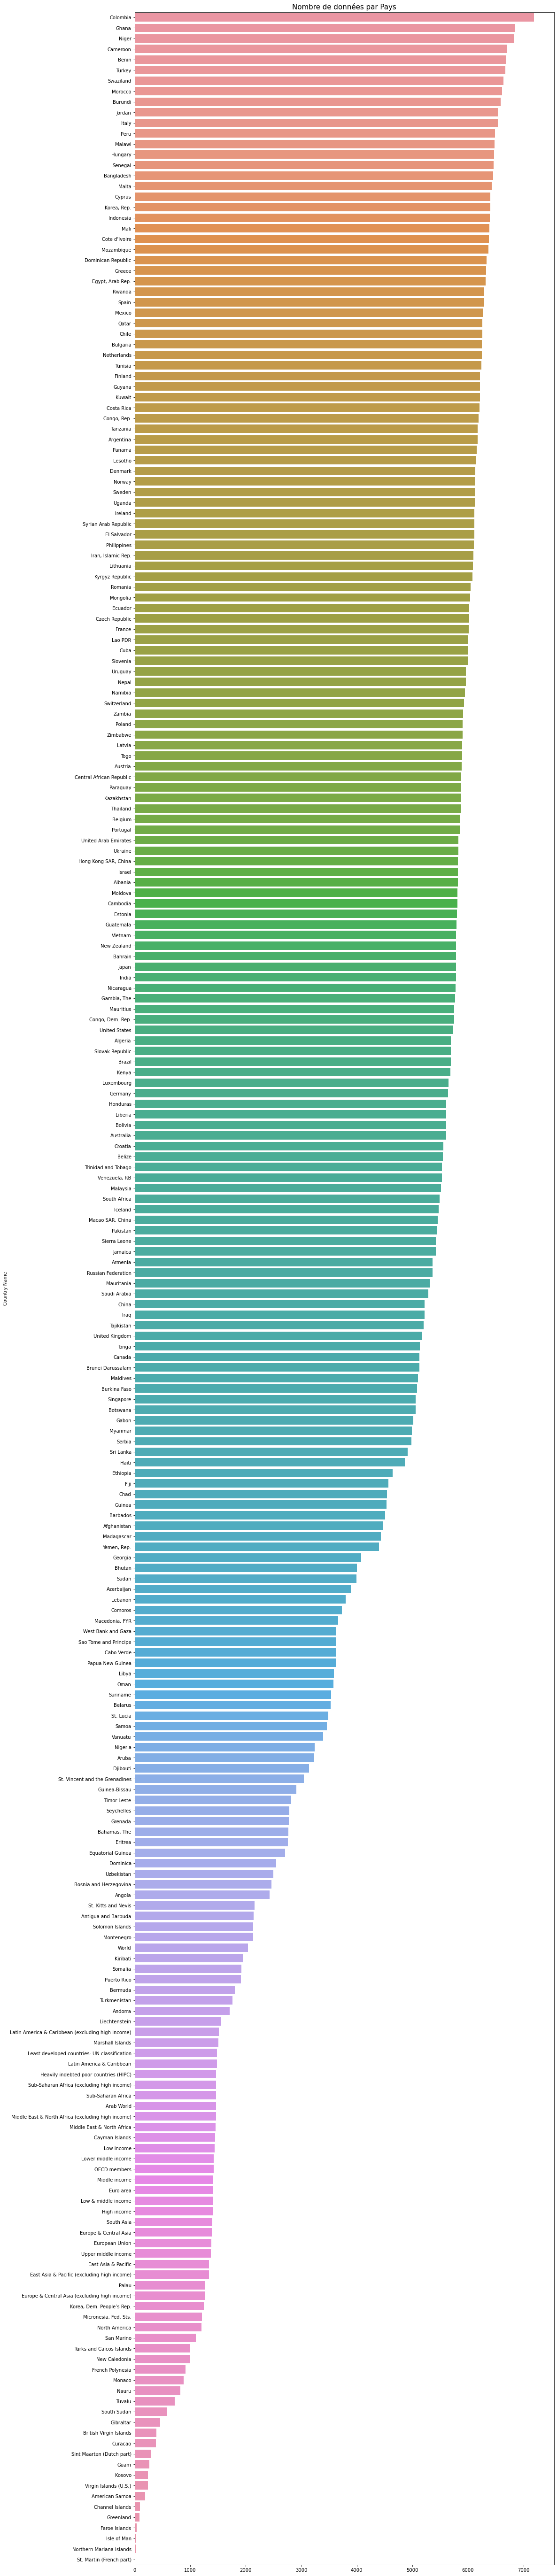

In [15]:
plt.figure(figsize=(16, 100))
plt.title('Nombre de données par Pays', size=15)
plot = sns.barplot(x = data1.groupby('Country Name')[['Années 70', 'Années 80', 'Années 90', 'Années 2000', 'Années 2010', '> Années 2020']].count().sum(axis=1).sort_values(ascending = False).values, 
                   y = data1.groupby('Country Name')[['Années 70', 'Années 80', 'Années 90', 'Années 2000', 'Années 2010', '> Années 2020']].count().sum(axis=1).sort_values(ascending = False).index)
plt.show()

Afin de conclure cette partie, nous pouvons obtenir plusieurs hypothèses :

- Le nombre de données varie fortement en fonction des annés puis par décennie, les années 2010 semblent cohérentes pour une analyse. Il faut tout de même étudier la possibilité de supprimer les années 2016 et 2017 de notre analyse à la vue du fort nombre de valeurs manquantes.
- Nous pouvons déjà constater que chaque pays détient 242 indicateurs mais de nombreux pays contiennent peu voir pas de données. Nous remarquons que les pays ayant peu de valeurs concernant principalement des régions géographiques ou des régions (Saint Martin par exemple). Il sera intéressant d'analyser le nombre de données par régions géographiques mais cette étude se fera au moment du nettoyage de données.
Nous pouvons remarquer qu'il serait important de procéder à une analyser les pays officiels pour en dégager des données plus concrètes sur notre problématique.

Cette possibilité pourrait nous permettre d'obtenir une meilleure analyse des principaux indicateurs.


# III. Nettoyage des fichiers

Notre analyse nous a permis de confirmer notre orientation de sélection deux fichiers.
Nous allons concernant le fichier data procéder à une suppression des années ayant peu de données. Nous allons conserver les années 2010 tout en supprimant les années 2016 et 2017 (conservation de 2010 à 2015).

## a. Nettoyage des colonnes

Ce fichier nécessite une simple suppression des colonnes non utiles à notre étude. Par la suite, nous pourrons procéder à une fusion entre les deux fichiers pour analyser notamment les régions.
A compter de cette donnée, il sera utile de procéder à une suppression des régions ou valeurs non pays (à renoter proprement).

In [16]:
print(StatsCountry.columns)
print(StatsData.columns)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '197

In [17]:
# Suppression des colonnes StatsCountry
StatsCountry.drop(columns = ['Table Name', 'Long Name','2-alpha code', 'Special Notes', 'Income Group', 'WB-2 code',
                  'National accounts base year', 'National accounts reference year',
                  'SNA price valuation', 'Lending category', 'Other groups',
                  'System of National Accounts', 'Alternative conversion factor',
                  'PPP survey year', 'Balance of Payments Manual in use',
                  'External debt Reporting status', 'System of trade',
                  'Government Accounting concept', 'IMF data dissemination standard',
                  'Latest population census', 'Latest household survey',
                  'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
                  'Latest industrial data', 'Latest trade data',
                  'Latest water withdrawal data', 'Unnamed: 31'], inplace = True )

In [18]:
# Suppression des colonnes StatsData
StatsData.drop(columns = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999','2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69', 'Années 70', 'Années 80', 'Années 90',
       'Années 2000', 'Années 2010', '> Années 2020'], inplace = True)

In [19]:
print(StatsCountry.columns)
print(StatsData.columns)

Index(['Country Code', 'Short Name', 'Currency Unit', 'Region'], dtype='object')
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')


## b. Nettoyage par ligne 

Nous pouvons constater sur les premières lignes que certaines données ne présentent que des valeurs nulles sur les lignes.
Nous allons ici procéder à la suppression des différentes lignes n'ayant aucune valeur pour les années.

In [20]:
# Nettoyage des lignes n'indiquant que des valeurs nulles pour les années

année = ['2010', '2011', '2012', '2013', '2014', '2015']
StatsData_tri = StatsData.dropna(how = 'all', subset = année)

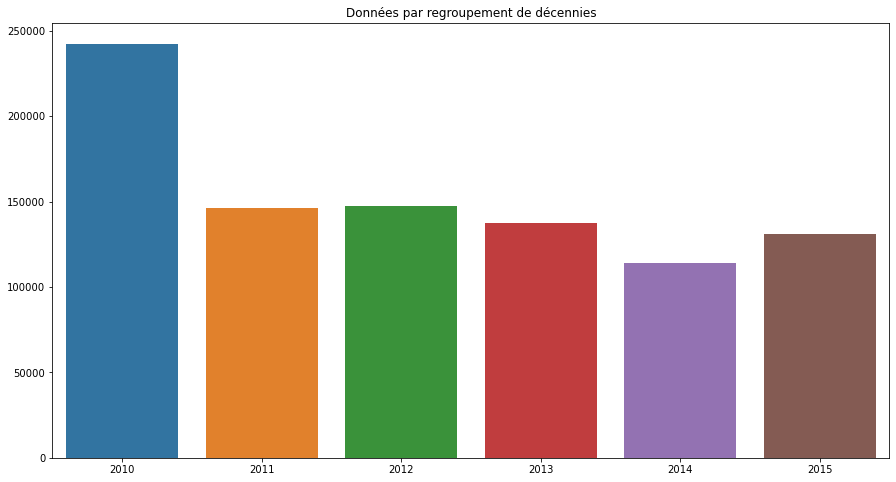

In [21]:
plt.figure(figsize=(15, 8))
plt.title('Données par regroupement de décennies')
plot = sns.barplot(y = StatsData_tri.shape[0] - StatsData_tri[['2010', '2011', '2012', '2013', '2014', '2015']].isna().sum().values, 
                   x = StatsData_tri[['2010', '2011', '2012', '2013', '2014', '2015']].isna().sum().index)
plt.show()

Text(0, 0.5, 'Taux de présence des données')

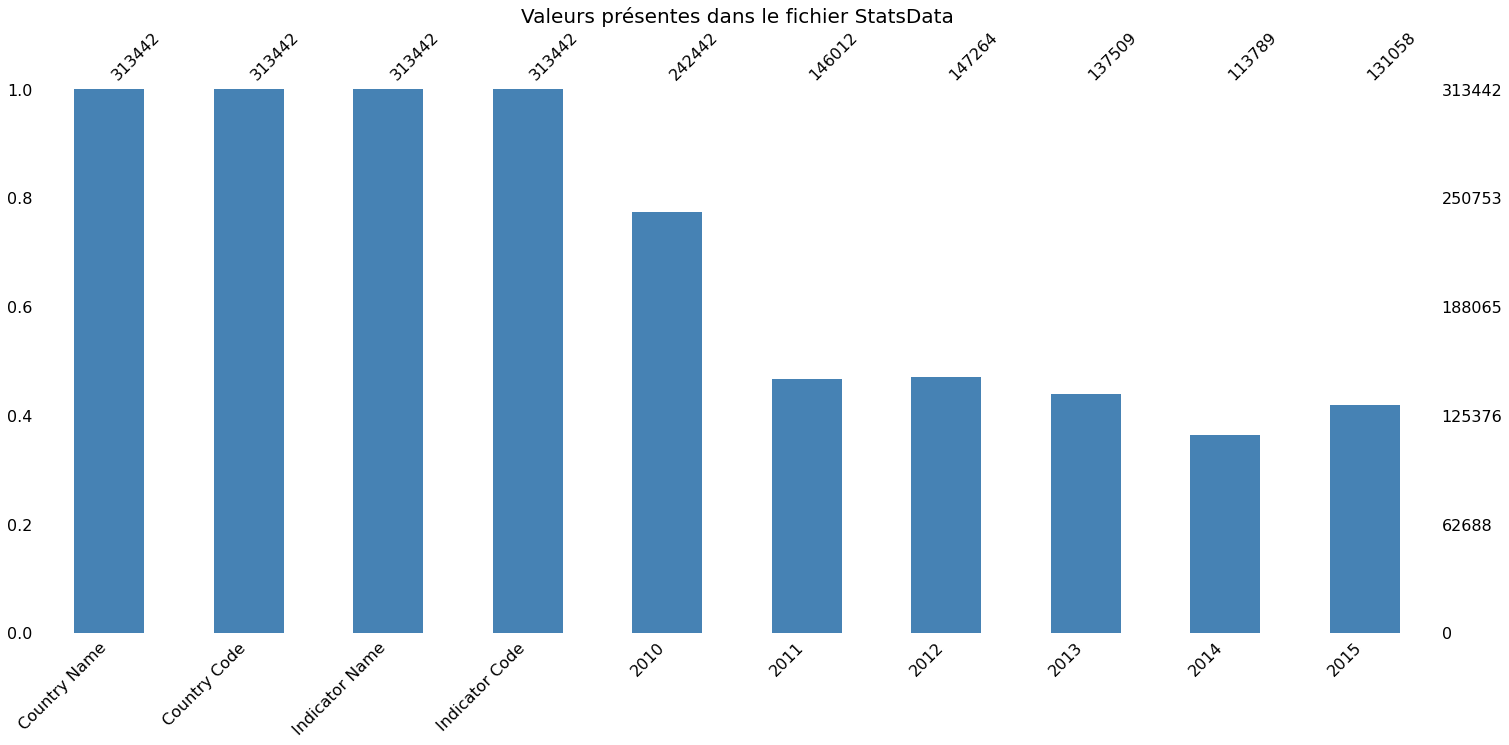

In [22]:
plt.figure(figsize = (12, 10))
msno.bar(StatsData_tri, labels=True, color='steelblue')
plt.title('Valeurs présentes dans le fichier StatsData', size = 20)
plt.ylabel('Taux de présence des données')

## c. Regroupement des deux fichiers

In [23]:
data_nettoye = StatsData_tri.merge(right = StatsCountry[['Country Code', 'Currency Unit', 'Region']],
                     on = 'Country Code',
                     how = 'left')


In [24]:
data_nettoye.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Currency Unit,Region
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,87.452583,87.526520,87.728172,87.039879,86.753387,NaN,NaN,NaN
4,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,76.197044,76.474968,77.319366,76.566711,76.620567,NaN,NaN,NaN


A ce moment de notre analyse, j'estime qu'il est nécessaire de retirer les régions ou zones de la colonne Country Code.
Nous allons procéder à la finalisation du nettoyage à travers cette pratique.

In [25]:
# Nous allons commencer par l'affichage de tous les noms
data_nettoye['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [26]:
# création d'une liste des non pays à supprimer
tri = ['Arab World',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 
       'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World']


In [27]:
data_nettoye = data_nettoye[-data_nettoye['Country Name'].isin(tri)]
data_nettoye['Country Name'].count()
data_nettoye.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Currency Unit,Region
9264,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,47.436790,50.627232,NaN,Afghan afghani,South Asia
9265,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,34.073261,37.641541,NaN,Afghan afghani,South Asia
9266,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,0.567060,0.598370,NaN,Afghan afghani,South Asia
9267,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,60.087059,62.906952,NaN,Afghan afghani,South Asia
9268,Afghanistan,AFG,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,31.332621,32.417030,NaN,Afghan afghani,South Asia


In [28]:
print(data_nettoye.shape)
print(data_nettoye['Country Name'].nunique())

(304178, 12)
217


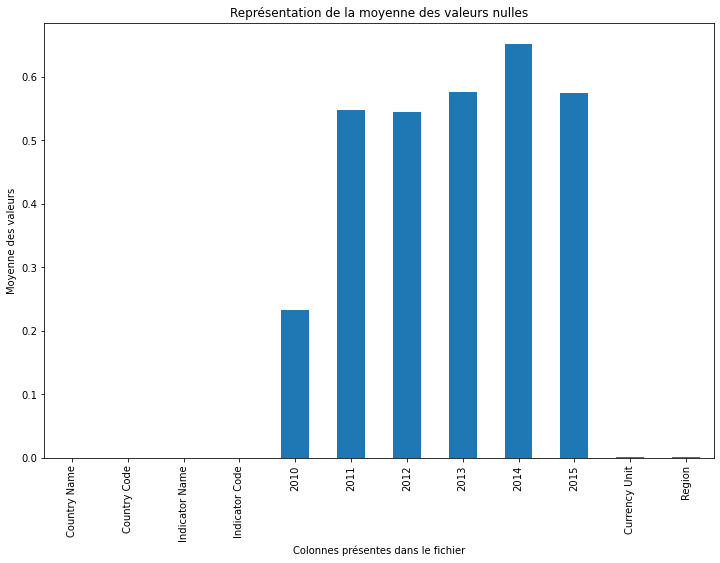

In [29]:
plt.figure(figsize = (12,8))

data_nettoye.isnull().mean().plot(kind = 'bar')
plt.title('Représentation de la moyenne des valeurs nulles')
plt.xlabel('Colonnes présentes dans le fichier')
plt.ylabel('Moyenne des valeurs')
plt.show()

# IV. Sélection des indicateurs

## a. Sélection des indicateurs

Nous avons pu constater que dans notre première analyse, nous avons 3665 indicateurs différents et que chaque pays détient le même nombre d'indicateurs.
Lors de notre nettoyage, nous avons pu gommer les lignes n'ayant pas de valeurs pour les années. 
Nous allons maintenant analyser les indicateurs après ce nettoyage pour en dégager les informations suivantes :
- Quelles sont les indicateurs ayant le plus de lignes,
- Quelle est la répartition des indicateurs et leur proportion

In [30]:
data_nettoye.groupby('Country Name')[['Indicator Code']].count()

,Indicator Code
Country Name,
Afghanistan,1233
Albania,1822
Algeria,1547
American Samoa,8
Andorra,607
Angola,737
Antigua and Barbuda,669
Argentina,1720
Armenia,1876


In [31]:
data_nettoye[['Indicator Code']].value_counts()

Indicator Code                
SP.POP.GROW                       215
SP.POP.TOTL                       215
SE.PRM.DURS                       208
SE.PRM.AGES                       208
SE.SEC.DURS.LO                    205
UIS.THDUR.0                       205
SE.SEC.AGES                       205
SE.SEC.DURS                       205
SE.SEC.DURS.UP                    205
NY.GDP.PCAP.CD                    204
IT.NET.USER.P2                    204
NY.GDP.MKTP.CD                    204
UIS.THAGE.3.A.GPV                 204
UIS.THAGE.0                       204
NY.GDP.PCAP.KD                    202
NY.GDP.MKTP.KD                    202
SE.PRM.ENRL.FE.ZS                 199
SE.PRM.ENRL                       199
SE.PRM.ENRL.FE                    199
SE.SEC.ENRL.GC                    198
SE.SEC.ENRL.GC.FE                 198
SE.SEC.ENRL.GC.FE.ZS              198
SP.SEC.TOTL.IN                    197
SP.SEC.UTOT.IN                    197
SP.PRE.TOTL.IN                    197
UIS.OE.56.40510    

In [32]:
# Afin d'analyser certains graphiques, nous allons de nouveau créer la variable pour les années 2010 (moyenne de 2010 à 2015)
data_nettoye['Années 2010'] = data_nettoye[[str(year) for year in [2010,2011,2012,2013,2014,2015]]].mean(1)

C:\Users\gregm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

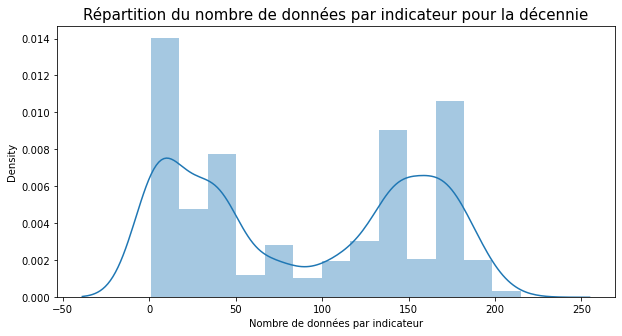

In [33]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la décennie', size=15)
plt.xlabel('Nombre de données par indicateur')
sns.distplot(data_nettoye[['Indicator Name', 'Années 2010']].groupby('Indicator Name').count().sort_values(by='Années 2010',ascending=False))
plt.plot()

Nous pouvons ici constater que cette répartition comporte deux grands groupes :
- entre 0 et 50,
- entre 150 et 200

Nous allons ici indiquer un filtre afin de conserver uniquement les indicateurs supérieurs à 150 indicateurs.

In [34]:
data_nettoye[['Indicator Name', 'Années 2010']].groupby('Indicator Name').count().sort_values(by='Années 2010',ascending=False)

,Années 2010
Indicator Name,
"Population, total",215
Population growth (annual %),215
Theoretical duration of primary education (years),208
Official entrance age to primary education (years),208
Official entrance age to lower secondary education (years),205
Theoretical duration of upper secondary education (years),205
Theoretical duration of secondary education (years),205
Theoretical duration of pre-primary education (years),205
Theoretical duration of lower secondary education (years),205


A ce moment de l'analyse, il est important de bien remettre en perspective notre projet d'analyse.

Nous allons nous arrêter sur 2 critères afin de sélectionner nos indicateurs :

1. La population

J'estime que les indicateurs les plus pertinents sont :
- Population totale : SP.POP.TOTL
- Population de lycéens et d'étudiants (indicateur 15-24) : SP.POP.1524.TO.UN

2. Internet
La formation étant effectuée en ligne, nous allons sélectionner le taux d'utilisateurs internet
- Utilisateurs internet : IT.NET.USER.P2


A partir des 3 indicateurs, nous aurons une idée plus précises de la population, du taux d'étudiants ou lycéens et des utilisateurs internet

## b. Analyse et interprétation des indicateurs

Nous allons ici procéder à la sélection unique de nos 3 indicateurs. A partir de cette étape, nous allons pouvoir rentrer dans le détail de nos 3 indicateurs et en ressortir les données pertinentes.

Ces données vont nous permettre de procéder à une liste permettant de sélectionner l'ensemble des pays

In [35]:
# Sélection de nos 3 indicateurs
indicateurs = ['SP.POP.TOTL',
              'SP.POP.1524.TO.UN',
               'IT.NET.USER.P2']

# modification du data pour procéder à cette sélection
data_final = data_nettoye[data_nettoye['Indicator Code'].isin(indicateurs)]

Nous allons ici procéder à l'analyse des indicateurs en fonction des pays mais également en fonction des régions.

In [36]:
print(data_final.shape)
data_final.head()

(600, 13)


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Currency Unit,Region,Années 2010
9839,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,4.0,5.0,5.454545e+00,5.9,7.0,8.260000e+00,Afghan afghani,South Asia,5.935758e+00
10186,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6090239.0,6330684.0,6.569239e+06,6803785.0,7032072.0,7.252785e+06,Afghan afghani,South Asia,6.679801e+06
10237,Afghanistan,AFG,"Population, total",SP.POP.TOTL,28803167.0,29708599.0,3.069696e+07,31731688.0,32758020.0,3.373649e+07,Afghan afghani,South Asia,3.123915e+07
11160,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,45.0,49.0,5.465596e+01,57.2,60.1,6.325293e+01,Albanian lek,Europe & Central Asia,5.486815e+01
11701,Albania,ALB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,608456.0,603104.0,5.941010e+05,582411.0,569427.0,5.562690e+05,Albanian lek,Europe & Central Asia,5.856280e+05


Text(0.5, 1.0, 'Valeurs présentes après nettoyage des données')

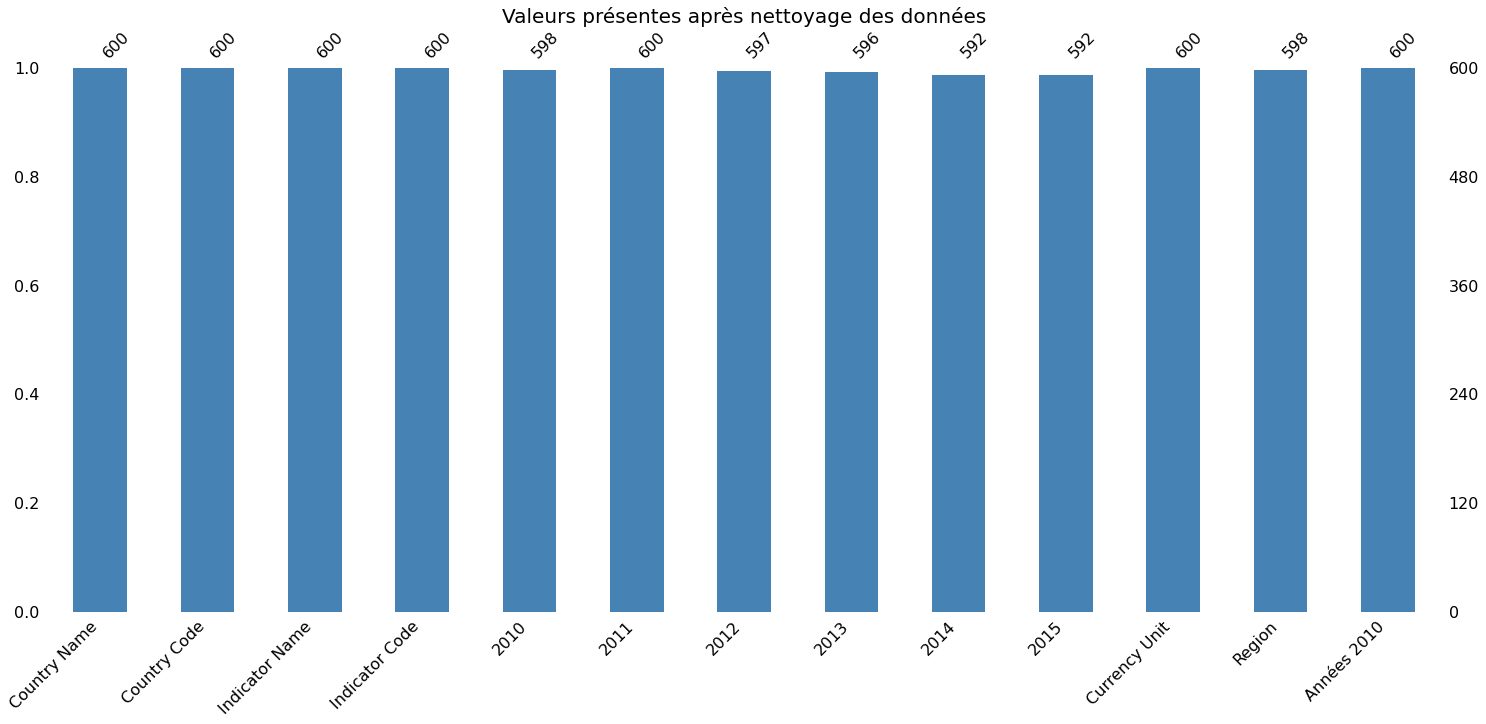

In [37]:
plt.figure (figsize = (12,8))
msno.bar(data_final,labels=True,color='steelblue')
plt.title ('Valeurs présentes après nettoyage des données', size = 20)

Quand nous analysons notre graphique de valeurs manquantes, il est interessant de constater que sur les 600 lignes conservées, à savoir les différents indicateurs sélectionnés. Le nombre de valeurs manquantes est très faible.
J'estime ici qu'au delà de la pertinence de la sélection, le nettoyage a parfaitement fonctionné.

<AxesSubplot:xlabel='Region,Indicator Code'>

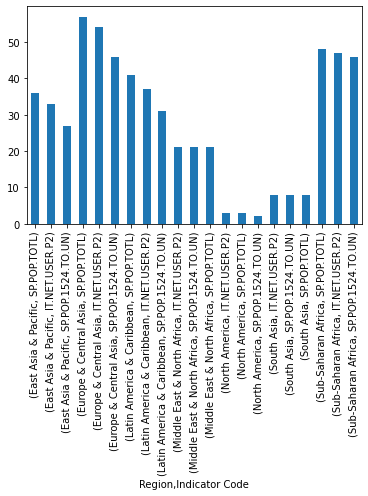

In [38]:
data_final.groupby('Region')['Indicator Code'].value_counts().plot(kind = 'bar')

In [39]:
# Création dans notre fichier de 3 colonnes pour obtenir les moyennes

# Création moyenne population
data_population = data_final[data_final['Indicator Code']=='SP.POP.TOTL'] 
data_population['Moyenne Population'] = (data_population['2010'] + data_population['2011'] + data_population['2012'] + data_population['2013'] + data_population['2014'] + data_population['2015'])/6

# Création moyenne des étudiants
data_etudiants = data_final[data_final['Indicator Code']=='SP.POP.1524.TO.UN']
data_etudiants['Moyenne Etudiants'] = (data_etudiants['2010'] + data_etudiants['2011'] + data_etudiants['2012'] + data_etudiants['2013'] + data_etudiants['2014'] + data_etudiants['2015'])/6

# Création moyenne utilisateurs internet
data_internet = data_final[data_final['Indicator Code']=='IT.NET.USER.P2']
data_internet['Moyenne Internet'] = (data_internet['2010'] + data_internet['2011'] + data_internet['2012'] + data_internet['2013'] + data_internet['2014'] + data_internet['2015'])/6

# Nous allons ensuite regrouper chacune de ses colonnes dans notre data pour l'étude

# On ajoute moyenne population
data_final = data_final.merge(right = data_population[['Country Code', 'Moyenne Population']],
                     on = 'Country Code',
                     how = 'left')

# On ajoute moyenne des etudiants
data_final = data_final.merge(right = data_etudiants[['Country Code', 'Moyenne Etudiants']],
                     on = 'Country Code',
                     how = 'left')

# On ajoute moyenne internet
data_final = data_final.merge(right = data_internet[['Country Code', 'Moyenne Internet']],
                     on = 'Country Code',
                     how = 'left')

C:\Users\gregm\AppData\Local\Temp/ipykernel_6936/2520566128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_population['Moyenne Population'] = (data_population['2010'] + data_population['2011'] + data_population['2012'] + data_population['2013'] + data_population['2014'] + data_population['2015'])/6
C:\Users\gregm\AppData\Local\Temp/ipykernel_6936/2520566128.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_etudiants['Moyenne Etudiants'] = (data_etudiants['2010'] + data_etudiants['2011'] + d

In [40]:
data_final.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Currency Unit,Region,Années 2010,Moyenne Population,Moyenne Etudiants,Moyenne Internet
0,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,4.0,5.0,5.454545e+00,5.9,7.0,8.260000e+00,Afghan afghani,South Asia,5.935758e+00,3.123915e+07,6.679801e+06,5.935758
1,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6090239.0,6330684.0,6.569239e+06,6803785.0,7032072.0,7.252785e+06,Afghan afghani,South Asia,6.679801e+06,3.123915e+07,6.679801e+06,5.935758
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,28803167.0,29708599.0,3.069696e+07,31731688.0,32758020.0,3.373649e+07,Afghan afghani,South Asia,3.123915e+07,3.123915e+07,6.679801e+06,5.935758
3,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,45.0,49.0,5.465596e+01,57.2,60.1,6.325293e+01,Albanian lek,Europe & Central Asia,5.486815e+01,2.897253e+06,5.856280e+05,54.868149
4,Albania,ALB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,608456.0,603104.0,5.941010e+05,582411.0,569427.0,5.562690e+05,Albanian lek,Europe & Central Asia,5.856280e+05,2.897253e+06,5.856280e+05,54.868149


In [41]:
data_final.describe()

,2010,2011,2012,2013,2014,2015,Années 2010,Moyenne Population,Moyenne Etudiants,Moyenne Internet
count,5.980000e+02,6.000000e+02,5.970000e+02,5.960000e+02,5.920000e+02,5.920000e+02,6.000000e+02,5.930000e+02,5.430000e+02,576.000000
mean,1.357420e+07,1.366901e+07,1.387093e+07,1.403410e+07,1.424982e+07,1.439075e+07,1.387741e+07,3.590043e+07,6.679533e+06,41.076229
std,7.922549e+07,7.978631e+07,8.066631e+07,8.141053e+07,8.236234e+07,8.304568e+07,8.080018e+07,1.361247e+08,2.429714e+07,28.009554
min,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e-01,9.900000e-01,1.083733e+00,0.000000e+00,1.076867e+04,1.386183e+04,0.847289
25%,5.377000e+01,5.681992e+01,6.193997e+01,6.595000e+01,6.931500e+01,7.255500e+01,6.276339e+01,1.344552e+06,5.065748e+05,14.484049
50%,5.313445e+05,5.346755e+05,5.317790e+05,5.394130e+05,5.432855e+05,5.348695e+05,5.334505e+05,7.286143e+06,1.306930e+06,39.616129
75%,5.522737e+06,5.528593e+06,5.634854e+06,5.689504e+06,5.685720e+06,5.740382e+06,5.620990e+06,2.525130e+07,4.901292e+06,63.527214
max,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.354233e+09,1.354233e+09,2.401628e+08,96.221048


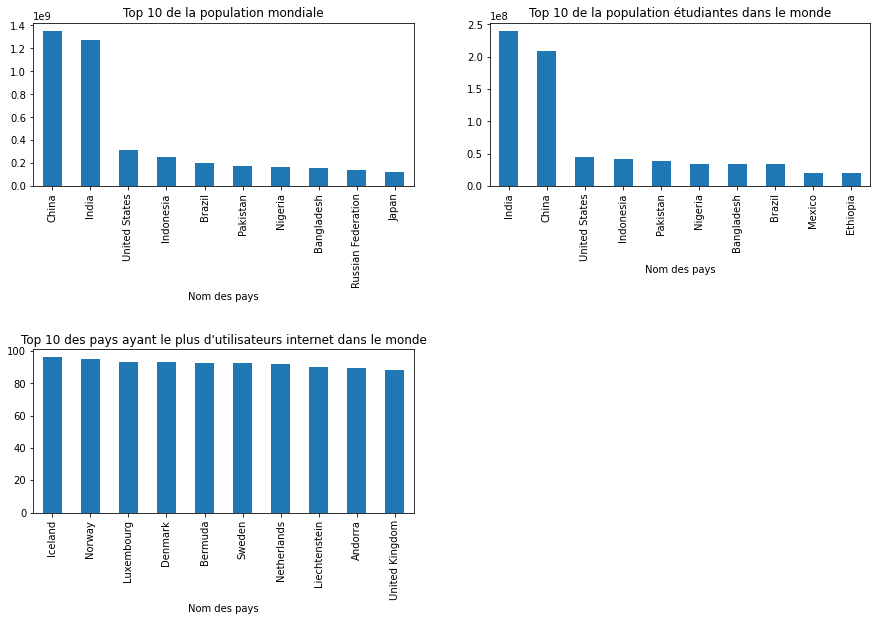

In [42]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
data_final.groupby('Country Name')['Moyenne Population'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title ('Top 10 de la population mondiale')
plt.xlabel('Nom des pays')


plt.subplot(2,2,2)
data_final.groupby('Country Name')['Moyenne Etudiants'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title ('Top 10 de la population étudiantes dans le monde')
plt.xlabel('Nom des pays')

plt.subplot(2,2,3)
data_final.groupby('Country Name')['Moyenne Internet'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title ("Top 10 des pays ayant le plus d'utilisateurs internet dans le monde")
plt.xlabel('Nom des pays')
plt.subplots_adjust(bottom=0.2, 
                    wspace=0.2, 
                    hspace=1)

Text(0.5, 1.0, 'Corrélation des données étudiées')

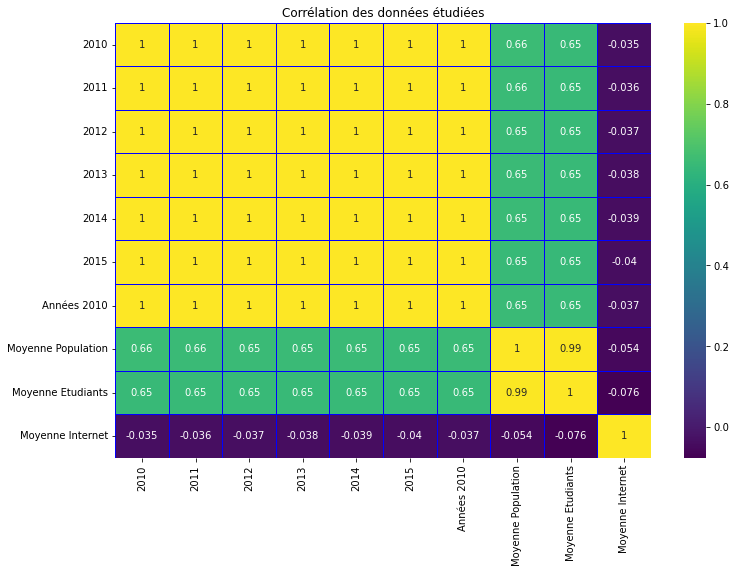

In [43]:
# Graphique sur la corrélation des données de notre data

plt.figure (figsize = (12,8))
sns.heatmap(data_final.corr(), annot = True, cmap = 'viridis',
           linewidth = 1,
           linecolor = 'b')
plt.title ('Corrélation des données étudiées')

Analyse des 3 nouvelles colonnes

Text(0.5, 1.0, 'Moyenne Population Etudiante')

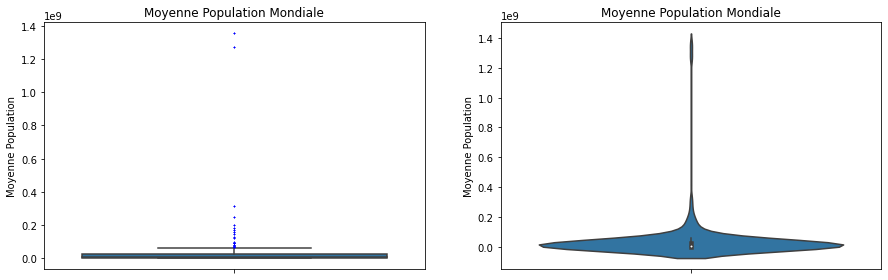

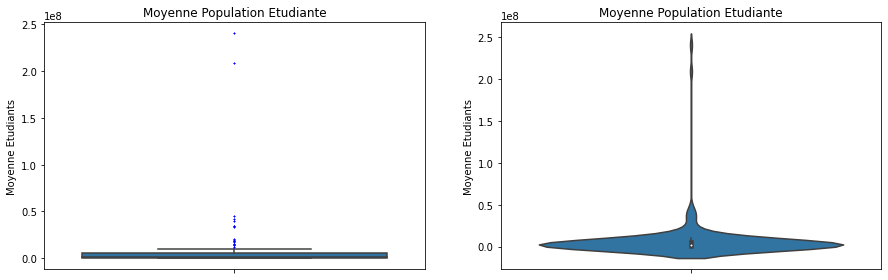

In [44]:
plt.figure(figsize = (15,10))
filerdesign = dict (marker = 'x', markerfacecolor = 'r', markersize = 1, markeredgecolor = 'b')
# Colonne Moyenne Population

plt.subplot(2,2,1)
sns.boxplot(y = data_final['Moyenne Population'], flierprops = filerdesign)
plt.title ('Moyenne Population Mondiale')

plt.subplot(2,2,2)
sns.violinplot(y = data_final['Moyenne Population'])
plt.title ('Moyenne Population Mondiale')

# Colonne Moyenne Etudiants

plt.figure(figsize = (15,10))
filerdesign = dict (marker = 'x', markerfacecolor = 'r', markersize = 1, markeredgecolor = 'b')

plt.subplot(2,2,3)
sns.boxplot(y = data_final['Moyenne Etudiants'], flierprops = filerdesign)
plt.title('Moyenne Population Etudiante')

plt.subplot(2,2,4)
sns.violinplot(y = data_final['Moyenne Etudiants'])
data_final['Moyenne Etudiants'].mean()
plt.title('Moyenne Population Etudiante')

<AxesSubplot:ylabel='Moyenne Internet'>

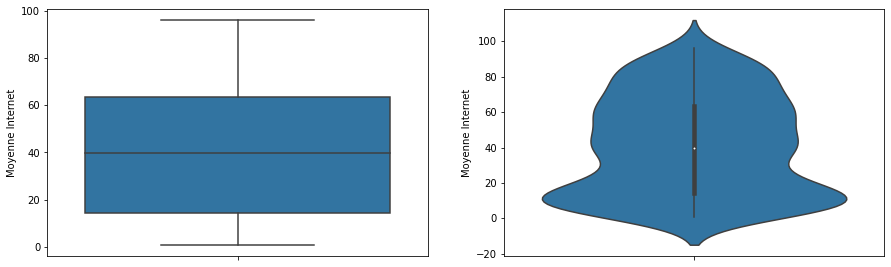

In [45]:
# Colonne moyenne internet

plt.figure(figsize = (15,10))
filerdesign = dict (marker = 'x', markerfacecolor = 'r', markersize = 1, markeredgecolor = 'b')

plt.subplot(2,2,1)
sns.boxplot(y = data_final['Moyenne Internet'], flierprops = filerdesign)

plt.subplot(2,2,2)
sns.violinplot(y = data_final['Moyenne Internet'])

Text(0.5, 1.0, 'Moyenne des utilisateurs internet par région durant les années 2010')

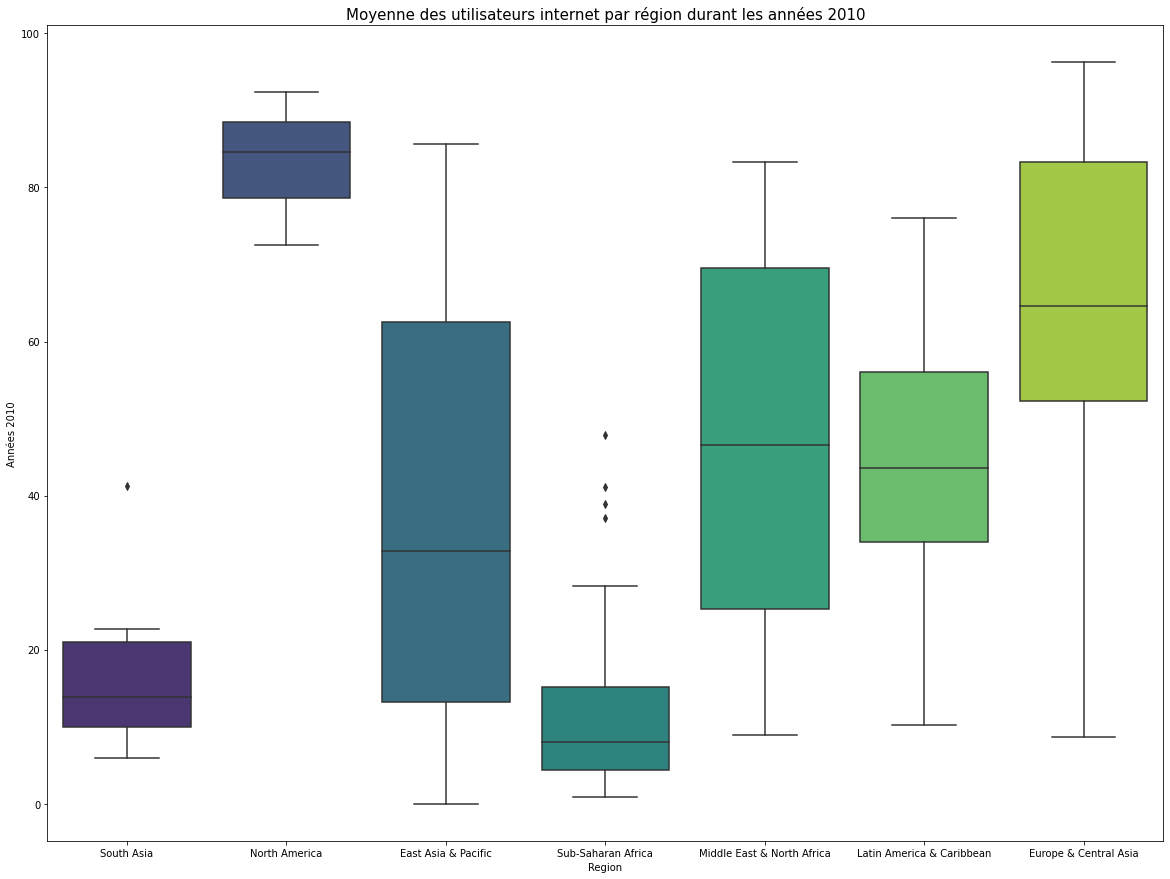

In [46]:
# Analyse de la valeur internet par région

# sélection indicateur
internet = data_final[data_final['Indicator Code'] =='IT.NET.USER.P2']

# sélection pour les régions
classement = data_final.groupby('Region')['Années 2010'].mean().sort_values(ascending = False).index


# graphique
plt.figure(figsize = (20,15))
sns.boxplot(data = internet, x = 'Region', y = 'Années 2010', order = classement, palette = 'viridis')
plt.title ('Moyenne des utilisateurs internet par région durant les années 2010', size = 15)

Concernant cette première colonne (Moyenne Population), il est important de signaler que nous avons deux valeurs que l'ont peut qualifier d'aberrante, à savoir l'Inde et la Chine avec des populations supérieures à la moyenne mondiale et étant les seules pays à dépasser le milliard d'habitants.
La moyenne obtenue, à savoir 35 900 425 habitants sera utilisée comme indicateur (je vais l'arrondier à 35 millions d'habitants).

Dans la second colonne (Moyenne Etudiants), nous retrouvons naturellement deux valeurs aberrantes, il existe bien une correlation entre ces deux colonnes.
La moyenne est ici de 6,7 millions d'étudiants. J'estime cette moyenne bien trop importante pour notre analyse, cela va provoquer un fort risque de ne trouver qu'une très faible quantité de pays. Cette colonne ne va pas rentrer dans les conditions de sélection

Enfin, la dernière colonne (Moyenne Internet) est ici mieux répartie et ne semble pas présenter un fort nombre de valeurs aberrantes.
La moyenne se situe à 41% d'utilisateurs dans le monde.
Nous pouvons de suite affirmer que tous les pays n'ont pas la même capacité d'obtention pour Internet (majoritairement dans les pays d'Afrique et du Moyen Orient) tandis que les pays d'Europe de l'Ouest, d'Amérique du Nord et une grande partie des pays en Asie ont un taux fort taux d'utilisateurs.
Je vais sélectionner un indicateur à hauteur de 55%

Nous allons ici procéder à la sélection des pays afin d'obtenir la liste des pays ayant au minimum 35 millions d'habitants et un taux d'utilisateurs de 55%.

# V. Comparatif sur conditions de sélection et utilisation d'un score

## a. Utilisation de la sélection complexe et de son interprétation

In [47]:
# Création indicateurs
test = data_final[(data_final['Moyenne Population'] >= 35000000) & (data_final['Moyenne Internet'] >=55)]

test

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Currency Unit,Region,Années 2010,Moyenne Population,Moyenne Etudiants,Moyenne Internet
17,Argentina,ARG,Internet users (per 100 people),IT.NET.USER.P2,4.500000e+01,5.100000e+01,5.580000e+01,5.990000e+01,6.470000e+01,6.804306e+01,Argentine peso,Latin America & Caribbean,5.740718e+01,4.231945e+07,6.873357e+06,57.407177
18,Argentina,ARG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6.828321e+06,6.858723e+06,6.880259e+06,6.892160e+06,6.894149e+06,6.886530e+06,Argentine peso,Latin America & Caribbean,6.873357e+06,4.231945e+07,6.873357e+06,57.407177
19,Argentina,ARG,"Population, total",SP.POP.TOTL,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,Argentine peso,Latin America & Caribbean,4.231945e+07,4.231945e+07,6.873357e+06,57.407177
186,France,FRA,Internet users (per 100 people),IT.NET.USER.P2,7.728000e+01,7.782000e+01,8.144000e+01,8.191980e+01,8.375000e+01,8.469450e+01,Euro,Europe & Central Asia,8.115072e+01,6.583078e+07,7.582918e+06,81.150716
187,France,FRA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,7.635485e+06,7.604177e+06,7.576981e+06,7.558568e+06,7.554426e+06,7.567872e+06,Euro,Europe & Central Asia,7.582918e+06,6.583078e+07,7.582918e+06,81.150716
188,France,FRA,"Population, total",SP.POP.TOTL,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,Euro,Europe & Central Asia,6.583078e+07,6.583078e+07,7.582918e+06,81.150716
200,Germany,DEU,Internet users (per 100 people),IT.NET.USER.P2,8.200000e+01,8.127000e+01,8.235000e+01,8.417000e+01,8.619000e+01,8.758980e+01,Euro,Europe & Central Asia,8.392830e+01,8.096541e+07,9.036869e+06,83.928300
201,Germany,DEU,"Population, ages 15-24, total",SP.POP.1524.TO.UN,9.388651e+06,9.255162e+06,9.111578e+06,8.964066e+06,8.819364e+06,8.682394e+06,Euro,Europe & Central Asia,9.036869e+06,8.096541e+07,9.036869e+06,83.928300
202,Germany,DEU,"Population, total",SP.POP.TOTL,8.177693e+07,8.027498e+07,8.042582e+07,8.064560e+07,8.098250e+07,8.168661e+07,Euro,Europe & Central Asia,8.096541e+07,8.096541e+07,9.036869e+06,83.928300
264,Italy,ITA,Internet users (per 100 people),IT.NET.USER.P2,5.368000e+01,5.439000e+01,5.583000e+01,5.845930e+01,5.563846e+01,5.814173e+01,Euro,Europe & Central Asia,5.602325e+01,5.999171e+07,5.757578e+06,56.023249


In [48]:
test['Country Name'].unique()

array(['Argentina', 'France', 'Germany', 'Italy', 'Japan', 'Korea, Rep.',
       'Poland', 'Russian Federation', 'Spain', 'United Kingdom',
       'United States'], dtype=object)

Text(0.5, 0, 'Nom des pays')

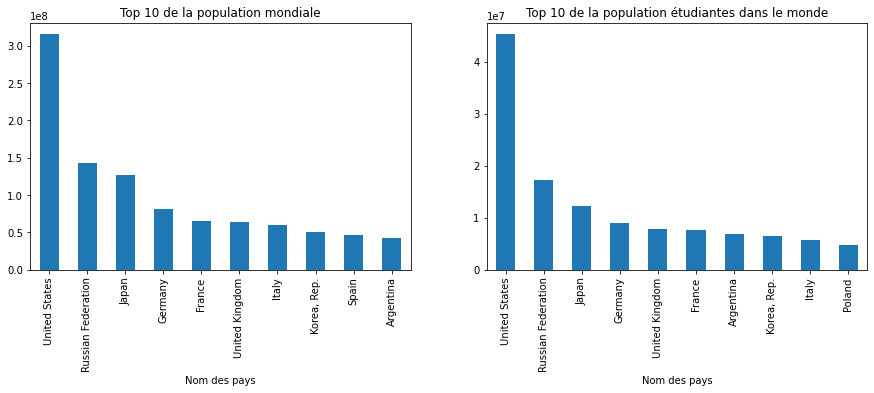

In [49]:
plt.figure(figsize = (15, 10))


plt.subplot(2,2,1)
test.groupby('Country Name')['Moyenne Population'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title ('Top 10 de la population mondiale')
plt.xlabel('Nom des pays')


plt.subplot(2,2,2)
test.groupby('Country Name')['Moyenne Etudiants'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title ('Top 10 de la population étudiantes dans le monde')
plt.xlabel('Nom des pays')

Text(0.5, 0, 'Nom des pays')

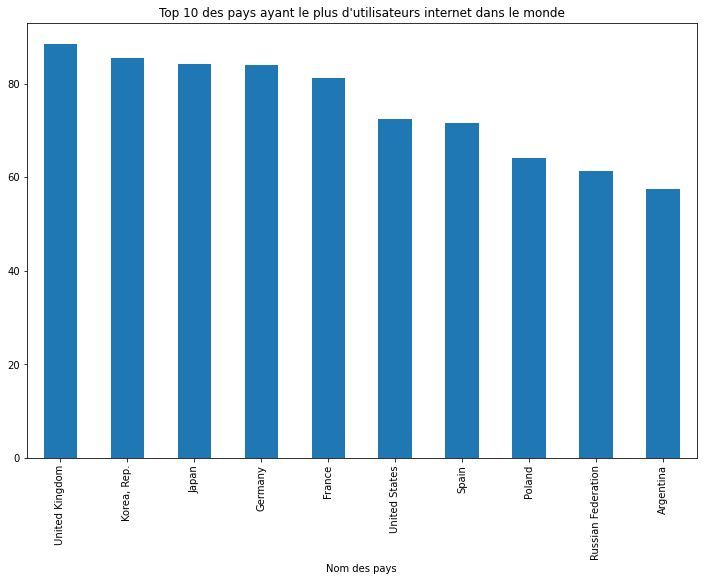

In [50]:
plt.figure (figsize = (12,8))
test.groupby('Country Name')['Moyenne Internet'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title ("Top 10 des pays ayant le plus d'utilisateurs internet dans le monde")
plt.xlabel('Nom des pays')

Text(0.5, 1.0, 'Répartition des pays selon les régions')

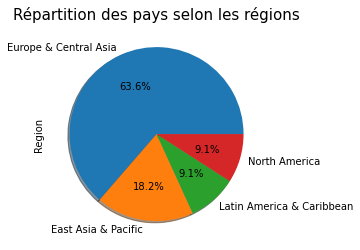

In [51]:
test['Region'].value_counts().plot(kind = 'pie', normalize = True, autopct='%1.1f%%',
       shadow = True)
plt.title('Répartition des pays selon les régions', size = 15)

In [52]:
# Tableau récapitulatif des données

test.pivot(index='Country Name',columns='Indicator Code', values = 'Années 2010')

Indicator Code,IT.NET.USER.P2,SP.POP.1524.TO.UN,SP.POP.TOTL
Country Name,,,
Argentina,57.407177,6.873357e+06,4.231945e+07
France,81.150716,7.582918e+06,6.583078e+07
Germany,83.928300,9.036869e+06,8.096541e+07
Italy,56.023249,5.757578e+06,5.999171e+07
Japan,84.190801,1.235106e+07,1.275657e+08
"Korea, Rep.",85.584096,6.566453e+06,5.031352e+07
Poland,64.004366,4.853617e+06,3.803459e+07
Russian Federation,61.283333,1.728045e+07,1.434059e+08
Spain,71.535767,4.416110e+06,4.660688e+07


Text(0.5, 0, 'Pays')

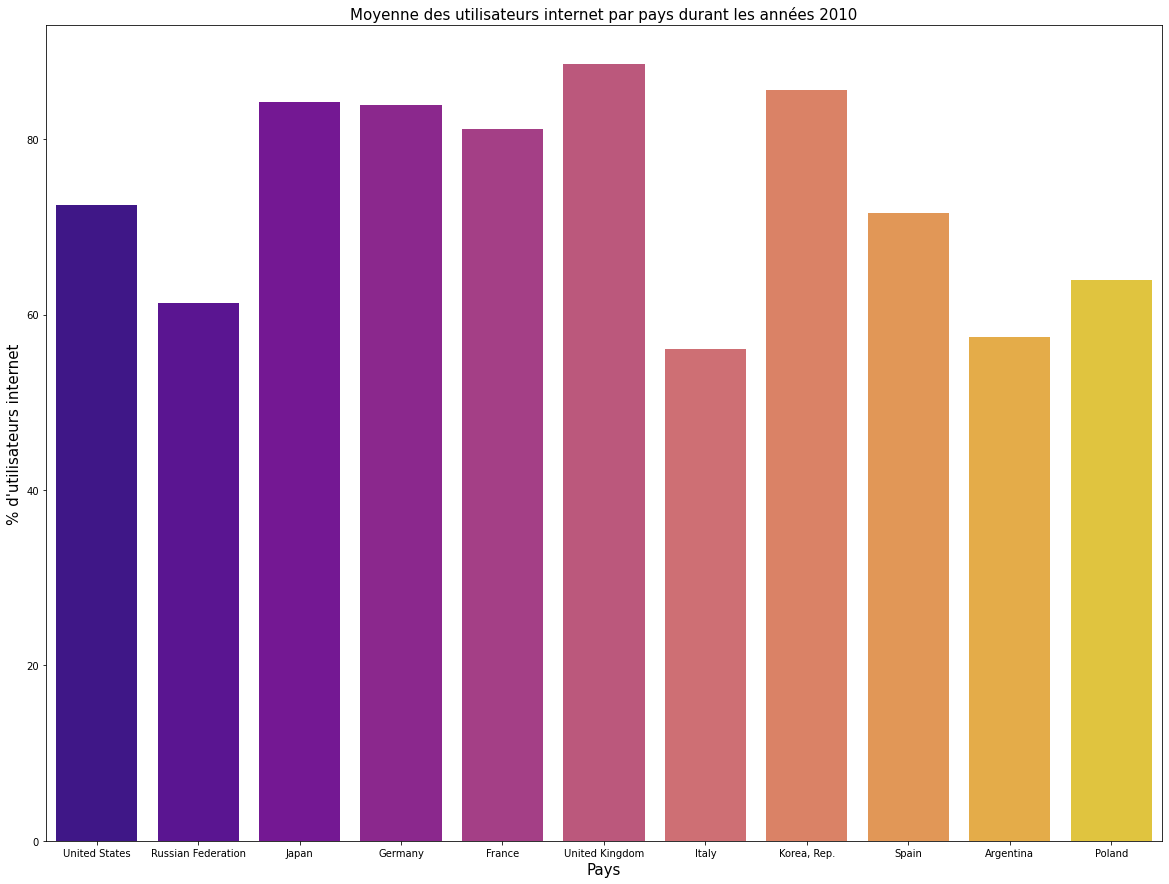

In [53]:
# Analyse de la valeur internet pour les pays sélectionnés

# sélection indicateur
pays = test[test['Indicator Code'] =='IT.NET.USER.P2']

# sélection pour les pays
pays2 = test.groupby('Country Name')['Années 2010'].mean().sort_values(ascending = False).index


# graphique
plt.figure(figsize = (20,15))
sns.barplot(data = pays, x = 'Country Name', y = 'Années 2010', order = pays2, palette = 'plasma')
plt.title ('Moyenne des utilisateurs internet par pays durant les années 2010', size = 15)
plt.ylabel("% d'utilisateurs internet", size = 15)
plt.xlabel('Pays', size = 15)

Quand nous analysons nos résultats, nous pouvons constater qu'une liste précise ressort pour les différents pays avec 11 pays. J'estime qu'il faut de suite supprimer la Russie à la vue du contexte actuelle.

Cette liste de 10 pays est tout à fait cohérente pour notre analyse.

Toutefois, nous constatons que ces différents critères ont un fort impact sur deux pays comme l'Inde et la Chine qui détiennent une population très importante d'étudiants.

Afin de pouvoir confirmer nos choix, nous allons procéder à la mise en place d'un score pour l'ensemble des pays en fonction des 3 indicateurs.
A partir de cette seconde tendance, nous allons pouvoir déterminer si l'ensemble des pays sélectionnés par des conditions sont identiques à la seconde sélection.

Nous pourrons alors sélectionner les pays présents dans les deux méthodes de sélection des pays afin d'avoir une analyse pertinente pour ces derniers.

## b. Création d'un score et interprétation

In [54]:
data_score = data_final

data_score['Score Population'] = data_score['Moyenne Population'] / data_score['Moyenne Population'].max()
data_score['Score Etudiant'] = data_score['Moyenne Etudiants'] / data_score['Moyenne Etudiants'].max()
data_score['Score Internet'] = data_score['Moyenne Internet'] / data_score['Moyenne Internet'].max()


data_score['SCORE_SYNT'] = (data_score['Score Population'] + data_score['Score Etudiant'] + data_score['Score Internet'])/3
data_score.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Currency Unit,Region,Années 2010,Moyenne Population,Moyenne Etudiants,Moyenne Internet,Score Population,Score Etudiant,Score Internet,SCORE_SYNT
0,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,4.0,5.0,5.454545e+00,5.9,7.0,8.260000e+00,Afghan afghani,South Asia,5.935758e+00,3.123915e+07,6.679801e+06,5.935758,0.023068,0.027814,0.061689,0.037523
1,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6090239.0,6330684.0,6.569239e+06,6803785.0,7032072.0,7.252785e+06,Afghan afghani,South Asia,6.679801e+06,3.123915e+07,6.679801e+06,5.935758,0.023068,0.027814,0.061689,0.037523
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,28803167.0,29708599.0,3.069696e+07,31731688.0,32758020.0,3.373649e+07,Afghan afghani,South Asia,3.123915e+07,3.123915e+07,6.679801e+06,5.935758,0.023068,0.027814,0.061689,0.037523
3,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,45.0,49.0,5.465596e+01,57.2,60.1,6.325293e+01,Albanian lek,Europe & Central Asia,5.486815e+01,2.897253e+06,5.856280e+05,54.868149,0.002139,0.002438,0.570230,0.191603
4,Albania,ALB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,608456.0,603104.0,5.941010e+05,582411.0,569427.0,5.562690e+05,Albanian lek,Europe & Central Asia,5.856280e+05,2.897253e+06,5.856280e+05,54.868149,0.002139,0.002438,0.570230,0.191603


Text(0.5, 1.0, 'Top 10 des régions selon scoring')

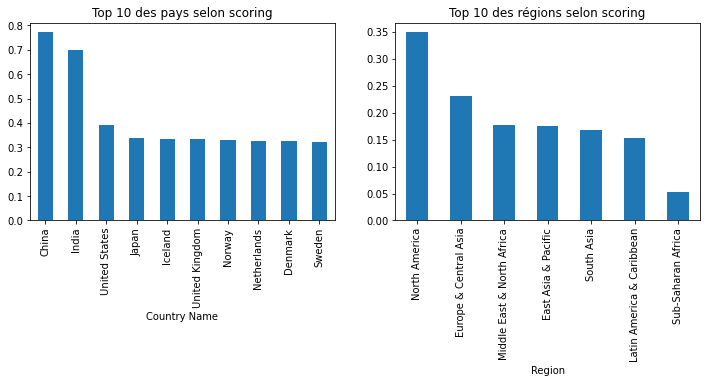

In [55]:
selection_pays = data_score.sort_values('SCORE_SYNT', ascending = False)[['Country Name', 'Region']]


# Graphique pour obtenir un scoring du top 10 des pays et selon les régions
plt.figure(figsize = (12, 8))

plt.subplot(2,2,1)
data_score.groupby('Country Name')['SCORE_SYNT'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title ('Top 10 des pays selon scoring')

plt.subplot(2,2,2)
data_score.groupby('Region')['SCORE_SYNT'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title ('Top 10 des régions selon scoring')

In [56]:
# Visualisation des données de la Chine
data_score[data_score['Country Name'] == 'China']

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Currency Unit,Region,Années 2010,Moyenne Population,Moyenne Etudiants,Moyenne Internet,Score Population,Score Etudiant,Score Internet,SCORE_SYNT
112,China,CHN,Internet users (per 100 people),IT.NET.USER.P2,3.430000e+01,3.830000e+01,4.230012e+01,4.580000e+01,4.790000e+01,5.030000e+01,Chinese yuan,East Asia & Pacific,4.315002e+01,1.354233e+09,2.087167e+08,43.15002,1.0,0.869063,0.448447,0.772503
113,China,CHN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.189740e+08,2.159144e+08,2.117359e+08,2.068465e+08,2.018025e+08,1.970268e+08,Chinese yuan,East Asia & Pacific,2.087167e+08,1.354233e+09,2.087167e+08,43.15002,1.0,0.869063,0.448447,0.772503
114,China,CHN,"Population, total",SP.POP.TOTL,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,Chinese yuan,East Asia & Pacific,1.354233e+09,1.354233e+09,2.087167e+08,43.15002,1.0,0.869063,0.448447,0.772503


In [57]:
# Visualisation des données de l'Inde'
data_score[data_score['Country Name'] == 'India']

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Currency Unit,Region,Années 2010,Moyenne Population,Moyenne Etudiants,Moyenne Internet,Score Population,Score Etudiant,Score Internet,SCORE_SYNT
245,India,IND,Internet users (per 100 people),IT.NET.USER.P2,7.500000e+00,1.007000e+01,1.258006e+01,1.510000e+01,2.100000e+01,2.600000e+01,Indian rupee,South Asia,1.537501e+01,1.270460e+09,2.401628e+08,15.37501,0.938139,1.0,0.159788,0.699309
246,India,IND,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.350568e+08,2.375485e+08,2.397136e+08,2.415350e+08,2.430027e+08,2.441202e+08,Indian rupee,South Asia,2.401628e+08,1.270460e+09,2.401628e+08,15.37501,0.938139,1.0,0.159788,0.699309
247,India,IND,"Population, total",SP.POP.TOTL,1.230981e+09,1.247236e+09,1.263066e+09,1.278562e+09,1.293859e+09,1.309054e+09,Indian rupee,South Asia,1.270460e+09,1.270460e+09,2.401628e+08,15.37501,0.938139,1.0,0.159788,0.699309


Nous pouvons constater que les pays présents ne correspondent pas précisemment aux pays obtenus à travers la méthode des conditions. On peut remarquer dans cette analyse que certains pays présent sont notamment dans notre sélection à travers une seule donnée comme la population pour la Chine et l'Inde ou le taux d'utilisateurs internet pour l'Islande et les Pays Bas.

Toutefois, nous pouvons constater que 3 pays sont présents dans les deux sélections :
- Les Etats Unis,
- Le Japon,
- Le Royaume Uni.

Concernant la Chine et l'Inde, ces deux derniers pays ne sont pas sélectionnés à la vue du faible taux d'utilisateurs internet avec respectivement 43% et 16%. Nous pouvons estimer que ce taux est trop faible pour notre projet de développement de contenus en ligne à l'international.

# Conclusion 

En conclusion, nous pouvons déjà confirmer que les fichiers fournis dans notre analyse vont nous permettre de répondre au projet d'expansion pour la start-up.
Les différents fichiers présents un nombre très importants d'indicateurs et peuvent nous permettre d'effectuer notre étude.
Nous avons principalement utilisé deux fichiers afin d'avoir une analyse plus pertinente de notre problématique et d'en extraire les informations les plus pertinentes.

Les indicateurs sélectionnés ont à la fois permis une analyse des différentes bases de données mais également de permettre une sélection stricte de plusieurs pays dans notre analyse. Ma volonté d'utiliser deux méthodes de sélections est utile pour déterminer de manière précise une technique de validation des pays.La méthode à travers des conditions de sélections est utile pour un premier tri tandis que la méthode de scoring va permettre une sélection en fonction des indicateurs. Le regroupement de l'analyse des deux techniques a permis de ressortir 3 pays.

Il est toutefois important de signaler que l'ensemble des indicateurs peut avoir une influence sur la sélection des pays.
Certains indicateurs ou données sont également à prendre en considération dans une analyse comme par exemple le niveau de revenus pour les personnes entre 15 et 24 ans ou le nombre de lycées et universités selon les pays.
Un point également à prendre en compte dans l'analyse et la présence de lycées, d'universités mais aussi des infrastructures selon les pays.
En effet, les 3 pays sélectionnés présentent des infrastructures très importantes (réseau électrique, lycées, universités, ...).

Enfin, il est important de signaler que les données datent de 2015, certains ont connu une très forte amélioration de leurs infrastructures ces dernières années.
Il serait intéressant, avant de rendre un avis définitif sur les pays, d'analyser les indicateurs pour l'année 2020. Nous pouvons estimer que certains pays pourraient entrer dans notre sélection finale de pays (Inde, Chine mais également le Brésil par exemple). Toutefois, une première analyse avec les 3 pays sélectionnés est tout à fait pertinente dans le cadre du projet d'expansion.

